In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import os

In [15]:
# Paths to training and testing datasets
train_dir = "/Users/dinesh/Documents/College/DATASET/wildfire/train"
test_dir = "/Users/dinesh/Documents/College/DATASET/wildfire/test"

# Image data generator for augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [16]:
# Load training and testing data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for 2 classes
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1887 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


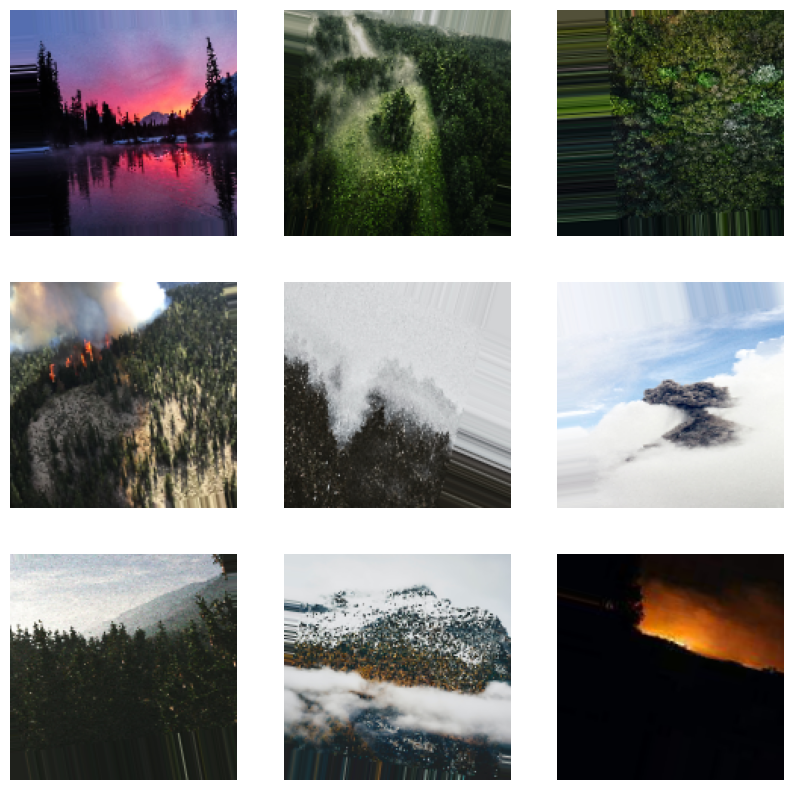

In [17]:
# Display a few training images
for images, labels in train_data:
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    break

plt.show()

In [18]:
X = np.random.rand(100, 4)  # 100 samples with 4 features
y = np.random.randint(0, 2, 100)  # Binary target (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Example predictions
example_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
prediction = classifier.predict(example_data)
print("\nPredicted class for example data:", prediction)

Accuracy: 0.5666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.47      0.58      0.52        12

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.56        30
weighted avg       0.59      0.57      0.57        30


Predicted class for example data: [1]
